In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
plt.rcParams['figure.figsize'] = (28, 18)

In [5]:
df.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [6]:
df.shape

(450000, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

<AxesSubplot:>

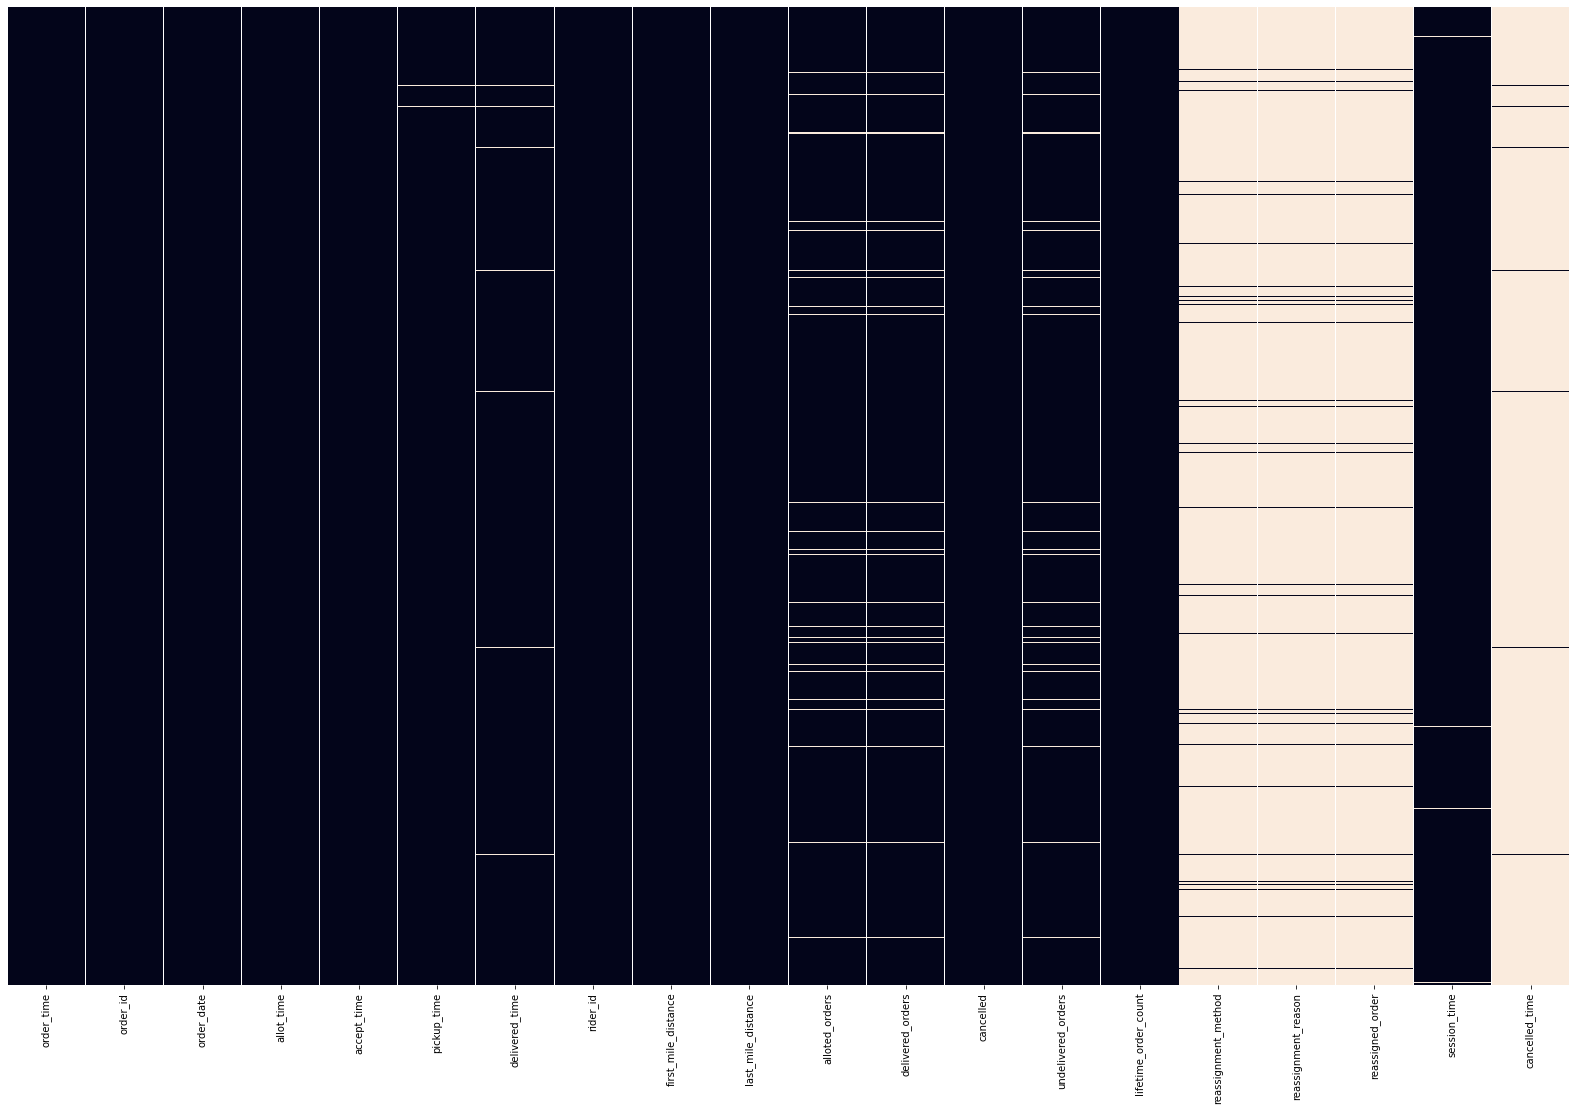

In [8]:
sns.heatmap(df.isna(), cbar=False, yticklabels=False, xticklabels=df.columns)

In [9]:
df.cancelled.value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

In [10]:
df.reassignment_method.value_counts()

auto      13383
manual      361
Name: reassignment_method, dtype: int64

In [11]:
df.reassignment_reason.value_counts()

Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket    7212
Reassignment Request from SE portal.                                            5300
Reassign                                                                        1241
Name: reassignment_reason, dtype: int64

In [12]:
df.reassigned_order.value_counts()

1.0    13753
Name: reassigned_order, dtype: int64

In [13]:
sns.set(font_scale=1.7)

<AxesSubplot:>

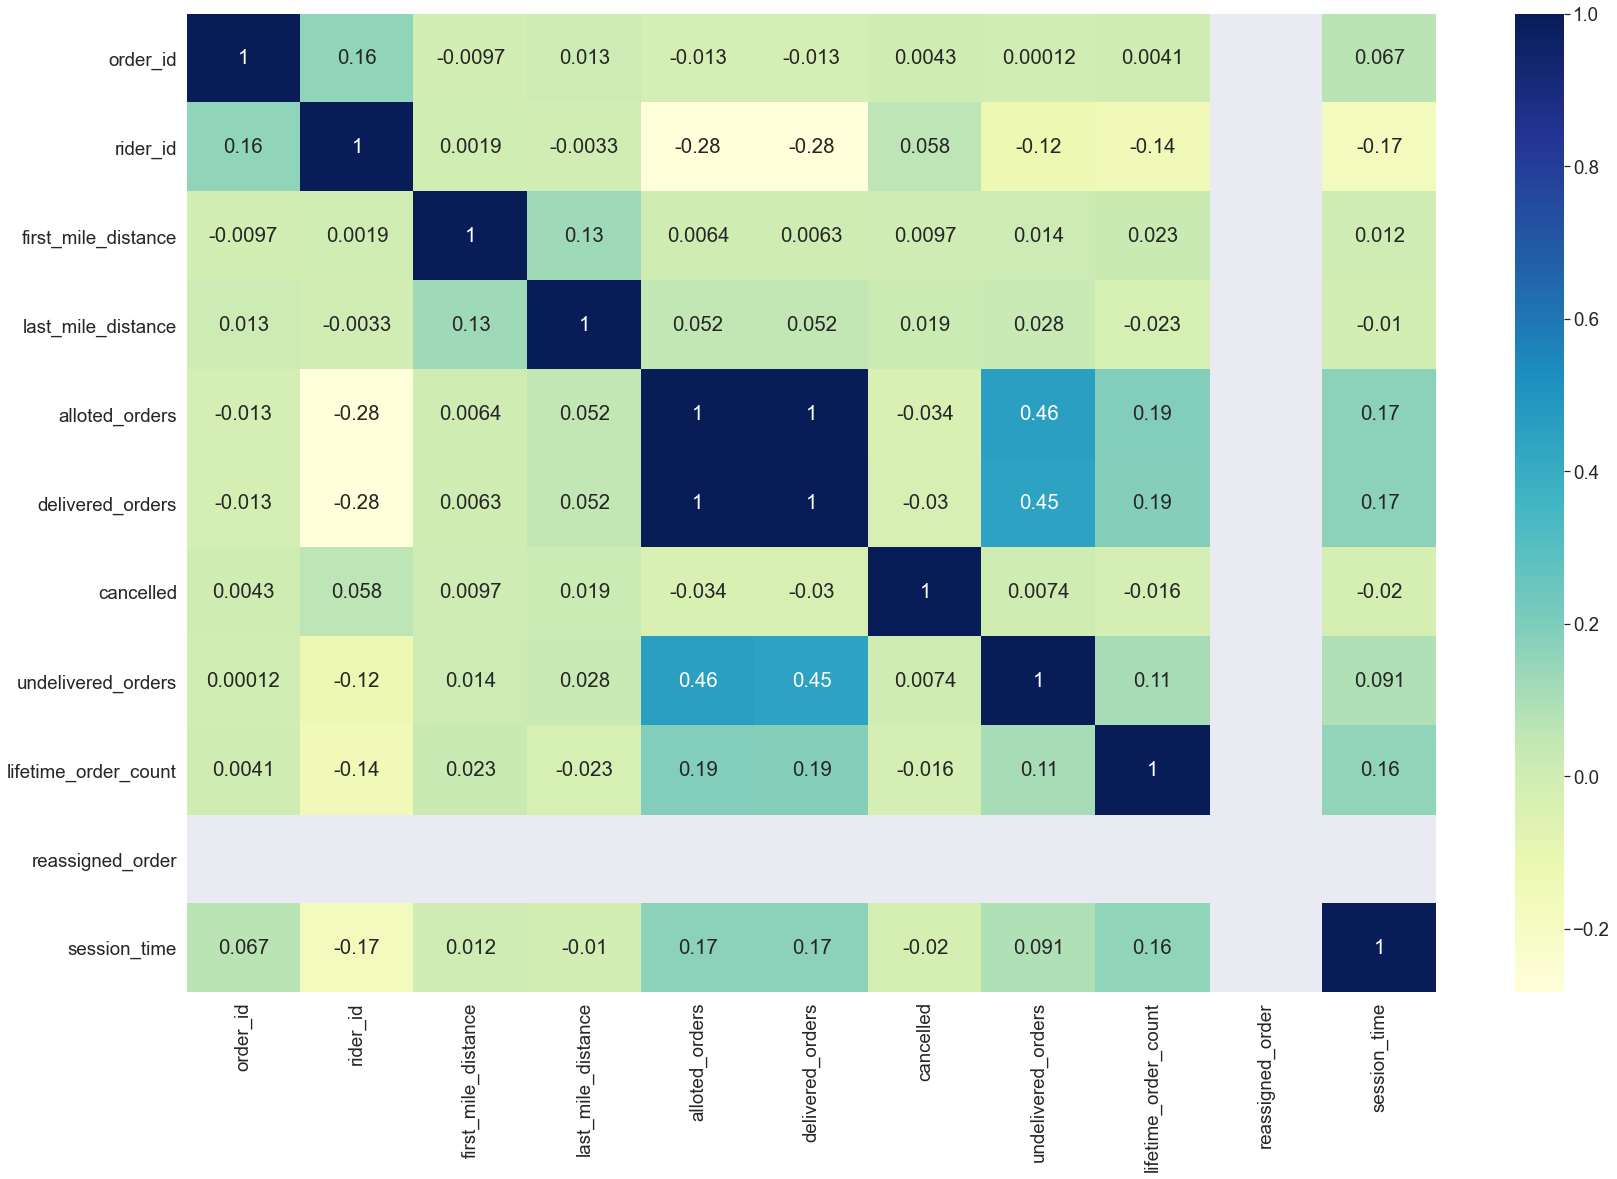

In [14]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

In [15]:
plt.rcParams["figure.figsize"] = (3,12)

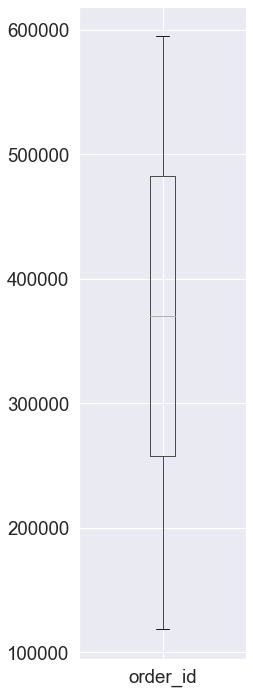

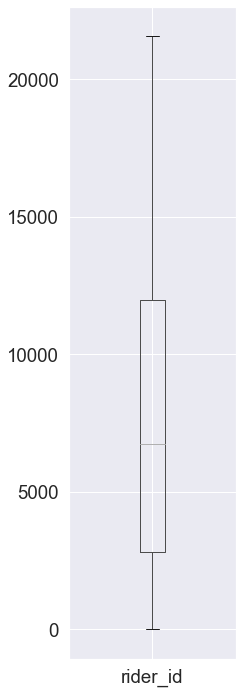

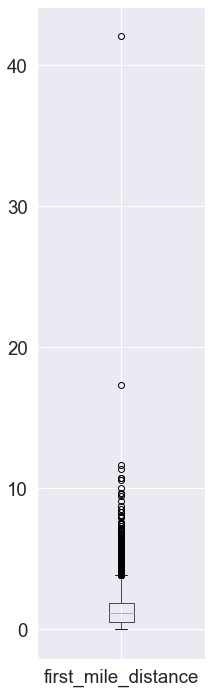

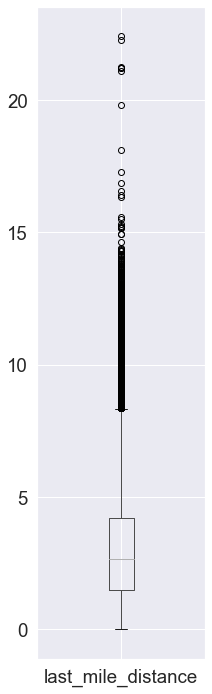

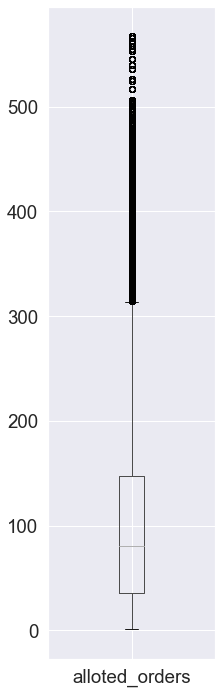

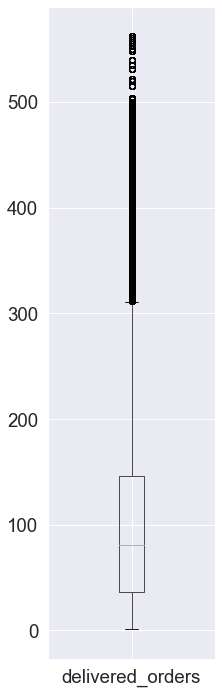

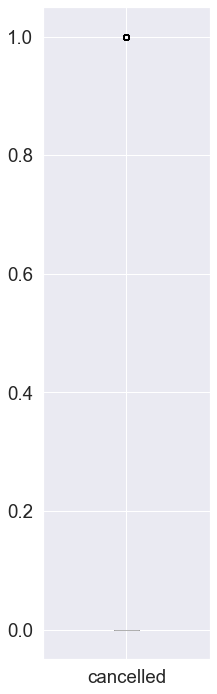

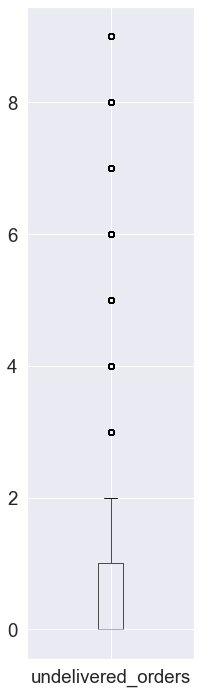

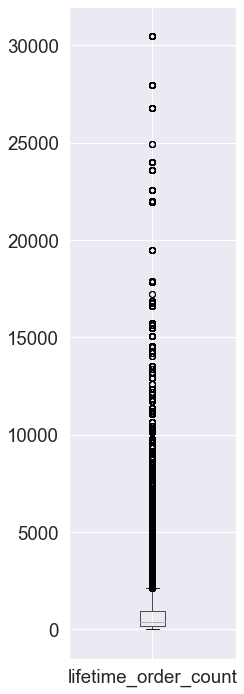

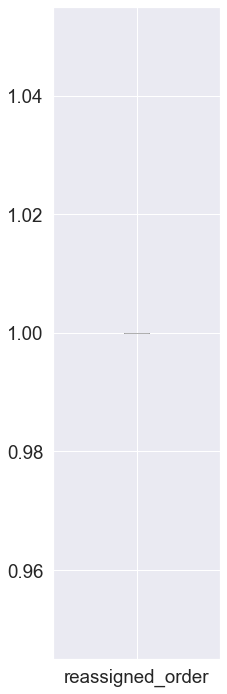

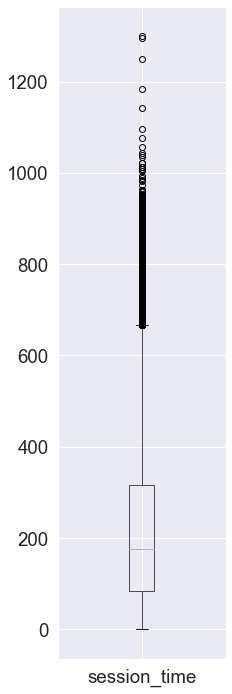

In [16]:
for column in df:
    if df[column].dtype != 'O':
        plt.figure()
        df.boxplot([column])

In [17]:
plt.rcParams["figure.figsize"] = (12,7)

<ipython-input-18-a9d3cbb5937e>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 864x504 with 0 Axes>

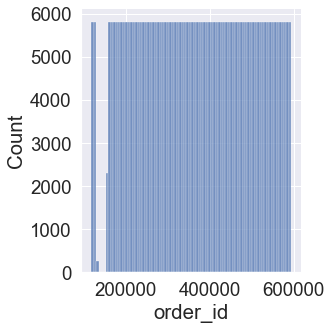

<Figure size 864x504 with 0 Axes>

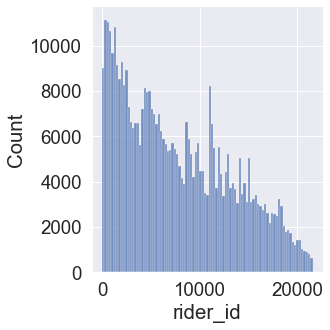

<Figure size 864x504 with 0 Axes>

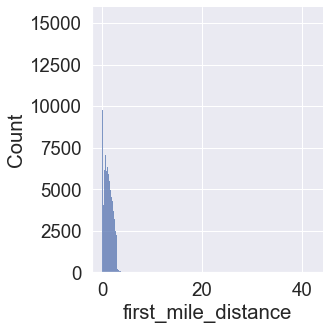

<Figure size 864x504 with 0 Axes>

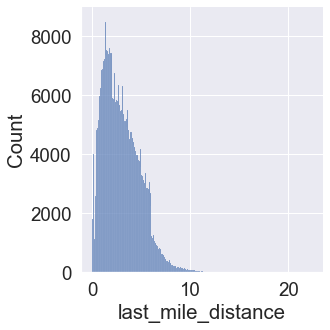

<Figure size 864x504 with 0 Axes>

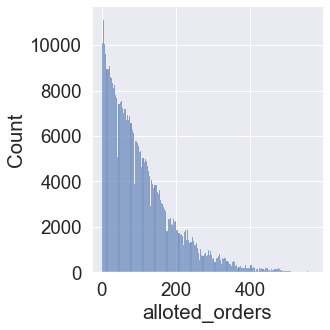

<Figure size 864x504 with 0 Axes>

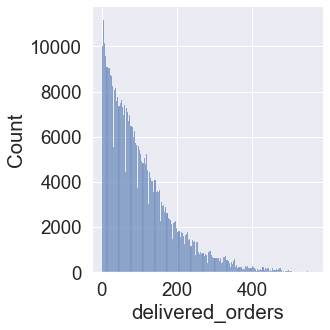

<Figure size 864x504 with 0 Axes>

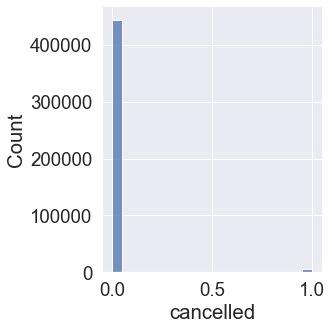

<Figure size 864x504 with 0 Axes>

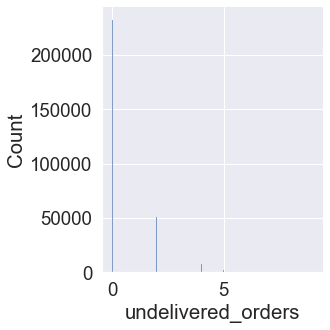

<Figure size 864x504 with 0 Axes>

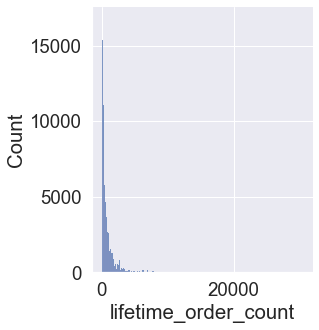

<Figure size 864x504 with 0 Axes>

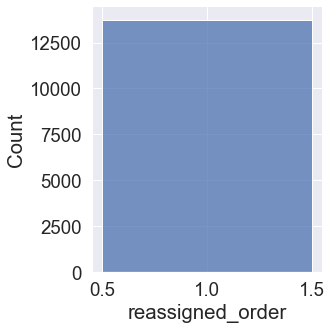

<Figure size 864x504 with 0 Axes>

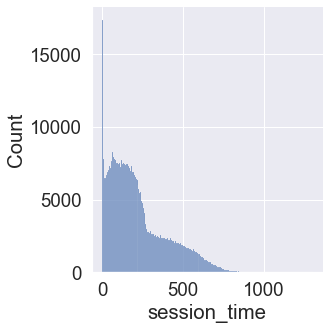

In [18]:
for column in df:
    if df[column].dtype != 'O':
        plt.figure()
        sns.displot(df[column])

In [19]:
df = df.drop(['order_id', 'order_date', 'reassigned_order', 'reassignment_method', 'reassignment_reason'], axis = 1)

In [20]:
df.head()

,order_time,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,cancelled_time
0,2021-01-26 02:21:35,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN
1,2021-01-26 02:33:16,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,NaN
2,2021-01-26 02:39:49,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,NaN
3,2021-01-26 02:47:53,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,NaN
4,2021-01-26 03:06:30,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,NaN


In [21]:
df.drop(['order_time'], axis = 1)

,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,cancelled_time
0,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN
1,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,NaN
2,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,NaN
3,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,NaN
4,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,369.516667,NaN
449996,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,239.133333,NaN
449997,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,204.150000,NaN
449998,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,65.583333,NaN


In [22]:
df.drop(['session_time', 'rider_id'], axis = 1)

,order_time,allot_time,accept_time,pickup_time,delivered_time,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,cancelled_time
0,2021-01-26 02:21:35,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN
1,2021-01-26 02:33:16,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN
2,2021-01-26 02:39:49,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN
3,2021-01-26 02:47:53,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN
4,2021-01-26 03:06:30,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,0.5789,0.19,4.0,4.0,0,0.0,127.0,NaN
449996,2021-02-06 10:03:17,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,1.9863,1.19,81.0,81.0,0,0.0,105.0,NaN
449997,2021-02-06 10:03:18,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,1.5944,1.61,28.0,28.0,0,0.0,1488.0,NaN
449998,2021-02-06 10:03:19,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,2.8939,4.68,72.0,72.0,0,0.0,105.0,NaN


In [23]:
df.shape

(450000, 15)

In [24]:
df.drop(['order_time','rider_id','session_time'], axis=1)

,allot_time,accept_time,pickup_time,delivered_time,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,cancelled_time
0,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN
1,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN
2,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN
3,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN
4,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,0.5789,0.19,4.0,4.0,0,0.0,127.0,NaN
449996,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,1.9863,1.19,81.0,81.0,0,0.0,105.0,NaN
449997,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,1.5944,1.61,28.0,28.0,0,0.0,1488.0,NaN
449998,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,2.8939,4.68,72.0,72.0,0,0.0,105.0,NaN


In [25]:
df['allot_time'] = pd.to_datetime(df['allot_time'])
df['accept_time'] = pd.to_datetime(df['accept_time'])
df['pickup_time'] = pd.to_datetime(df['pickup_time'])
df['delivered_time'] = pd.to_datetime(df['delivered_time'])

In [26]:
t1 = df['accept_time'] - df['allot_time']
t2 = df['pickup_time'] - df['accept_time']
t3 = df['delivered_time'] - df['pickup_time']
df['t1'] = t1
df['t2'] = t2
df['t3'] = t3
df.head()
df.drop(['order_time','allot_time','accept_time','pickup_time','cancelled_time'], axis = 1)

,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,t1,t2,t3
0,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,0 days 00:00:09,0 days 00:10:43,0 days 00:16:56
1,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,0 days 00:00:48,0 days 00:15:40,0 days 00:20:50
2,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,0 days 00:00:16,0 days 00:15:47,0 days 00:16:46
3,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,0 days 00:00:41,0 days 00:32:45,0 days 00:19:14
4,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,0 days 00:00:36,0 days 00:23:41,0 days 00:28:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:44:08,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,369.516667,0 days 00:00:30,0 days 00:23:15,0 days 00:16:39
449996,2021-02-06 10:31:43,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,239.133333,0 days 00:01:16,0 days 00:17:43,0 days 00:09:26
449997,2021-02-06 10:26:56,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,204.150000,0 days 00:00:33,0 days 00:14:27,0 days 00:07:50
449998,2021-02-06 10:30:41,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,65.583333,0 days 00:02:22,0 days 00:14:58,0 days 00:10:02


In [27]:
df.shape

(450000, 18)

In [28]:
df = df.drop(['cancelled_time'], axis = 1)

In [29]:
df.head()

,order_time,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,t1,t2,t3
0,2021-01-26 02:21:35,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,0 days 00:00:09,0 days 00:10:43,0 days 00:16:56
1,2021-01-26 02:33:16,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,0 days 00:00:48,0 days 00:15:40,0 days 00:20:50
2,2021-01-26 02:39:49,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,0 days 00:00:16,0 days 00:15:47,0 days 00:16:46
3,2021-01-26 02:47:53,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,0 days 00:00:41,0 days 00:32:45,0 days 00:19:14
4,2021-01-26 03:06:30,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,0 days 00:00:36,0 days 00:23:41,0 days 00:28:37


In [30]:
df.rename(columns={"t1" : "accept_duration", "t2" : 'pickup_duration', 't3' : 'deliver_duration'}, inplace=True)

In [31]:
df.head()

,order_time,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,accept_duration,pickup_duration,deliver_duration
0,2021-01-26 02:21:35,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,0 days 00:00:09,0 days 00:10:43,0 days 00:16:56
1,2021-01-26 02:33:16,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,0 days 00:00:48,0 days 00:15:40,0 days 00:20:50
2,2021-01-26 02:39:49,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,0 days 00:00:16,0 days 00:15:47,0 days 00:16:46
3,2021-01-26 02:47:53,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,0 days 00:00:41,0 days 00:32:45,0 days 00:19:14
4,2021-01-26 03:06:30,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,0 days 00:00:36,0 days 00:23:41,0 days 00:28:37


In [32]:
df['accept_duration'] = pd.to_timedelta(df['accept_duration']).dt.total_seconds()
df['pickup_duration'] = pd.to_timedelta(df['pickup_duration']).dt.total_seconds()
df['deliver_duration'] = pd.to_timedelta(df['deliver_duration']).dt.total_seconds()

In [33]:
df.head()

,order_time,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,accept_duration,pickup_duration,deliver_duration
0,2021-01-26 02:21:35,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,9.0,643.0,1016.0
1,2021-01-26 02:33:16,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,48.0,940.0,1250.0
2,2021-01-26 02:39:49,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,16.0,947.0,1006.0
3,2021-01-26 02:47:53,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,41.0,1965.0,1154.0
4,2021-01-26 03:06:30,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,36.0,1421.0,1717.0


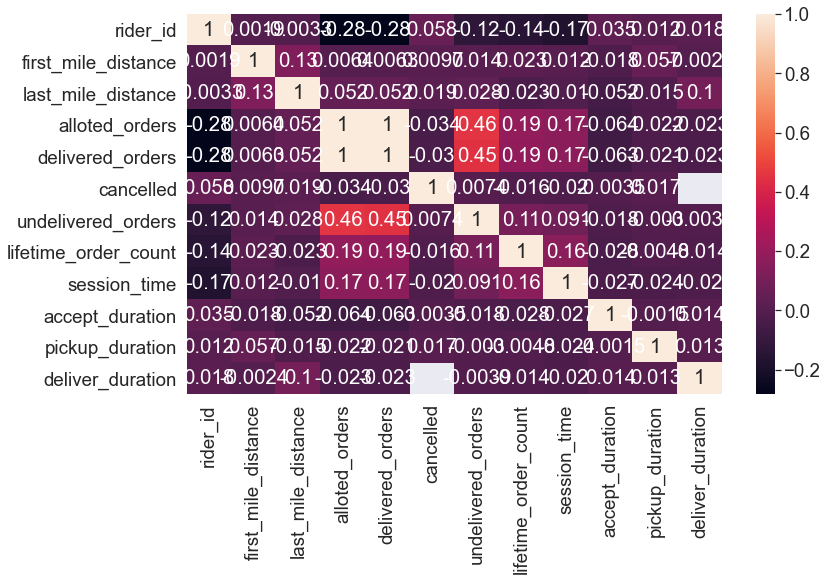

In [34]:
sns.heatmap(df.corr(),annot = True);
sns.set(font_scale=0.75)

In [35]:
df = df.drop(['alloted_orders','order_time','allot_time','accept_time','pickup_time','delivered_time','rider_id'], axis = 1)

In [36]:
df.head()

,first_mile_distance,last_mile_distance,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,accept_duration,pickup_duration,deliver_duration
0,1.5666,2.65,46.0,0,0.0,621.0,NaN,9.0,643.0,1016.0
1,2.5207,2.76,8.0,0,0.0,105.0,3.266667,48.0,940.0,1250.0
2,2.2074,4.80,1.0,0,0.0,66.0,9.816667,16.0,947.0,1006.0
3,2.1894,6.38,1.0,0,0.0,127.0,17.533333,41.0,1965.0,1154.0
4,2.7870,4.01,34.0,0,0.0,84.0,1.350000,36.0,1421.0,1717.0


In [37]:
df = df.drop(['session_time'], axis = 1)

In [38]:
df.shape

(450000, 9)

In [39]:
df = df.drop(['delivered_orders'], axis = 1)

In [40]:
df['undelivered_orders'].value_counts().sum()

432659

In [41]:
df['undelivered_orders']=df['undelivered_orders'].fillna(1)

In [42]:
df['undelivered_orders'].value_counts()

0.0    232686
1.0    135444
2.0     50582
3.0     20011
4.0      7733
5.0      1851
6.0       932
7.0       600
8.0       105
9.0        56
Name: undelivered_orders, dtype: int64

In [43]:
df['undelivered_orders'].isna().sum()

0

In [44]:
df.head()

,first_mile_distance,last_mile_distance,cancelled,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,1.5666,2.65,0,0.0,621.0,9.0,643.0,1016.0
1,2.5207,2.76,0,0.0,105.0,48.0,940.0,1250.0
2,2.2074,4.80,0,0.0,66.0,16.0,947.0,1006.0
3,2.1894,6.38,0,0.0,127.0,41.0,1965.0,1154.0
4,2.7870,4.01,0,0.0,84.0,36.0,1421.0,1717.0


In [45]:
df.shape

(450000, 8)

In [47]:
df['pickup_duration'].isna().sum()

2421

In [50]:
df.head()

,first_mile_distance,last_mile_distance,cancelled,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,1.5666,2.65,0,0.0,621.0,9.0,643.0,1016.0
1,2.5207,2.76,0,0.0,105.0,48.0,940.0,1250.0
2,2.2074,4.80,0,0.0,66.0,16.0,947.0,1006.0
3,2.1894,6.38,0,0.0,127.0,41.0,1965.0,1154.0
4,2.7870,4.01,0,0.0,84.0,36.0,1421.0,1717.0


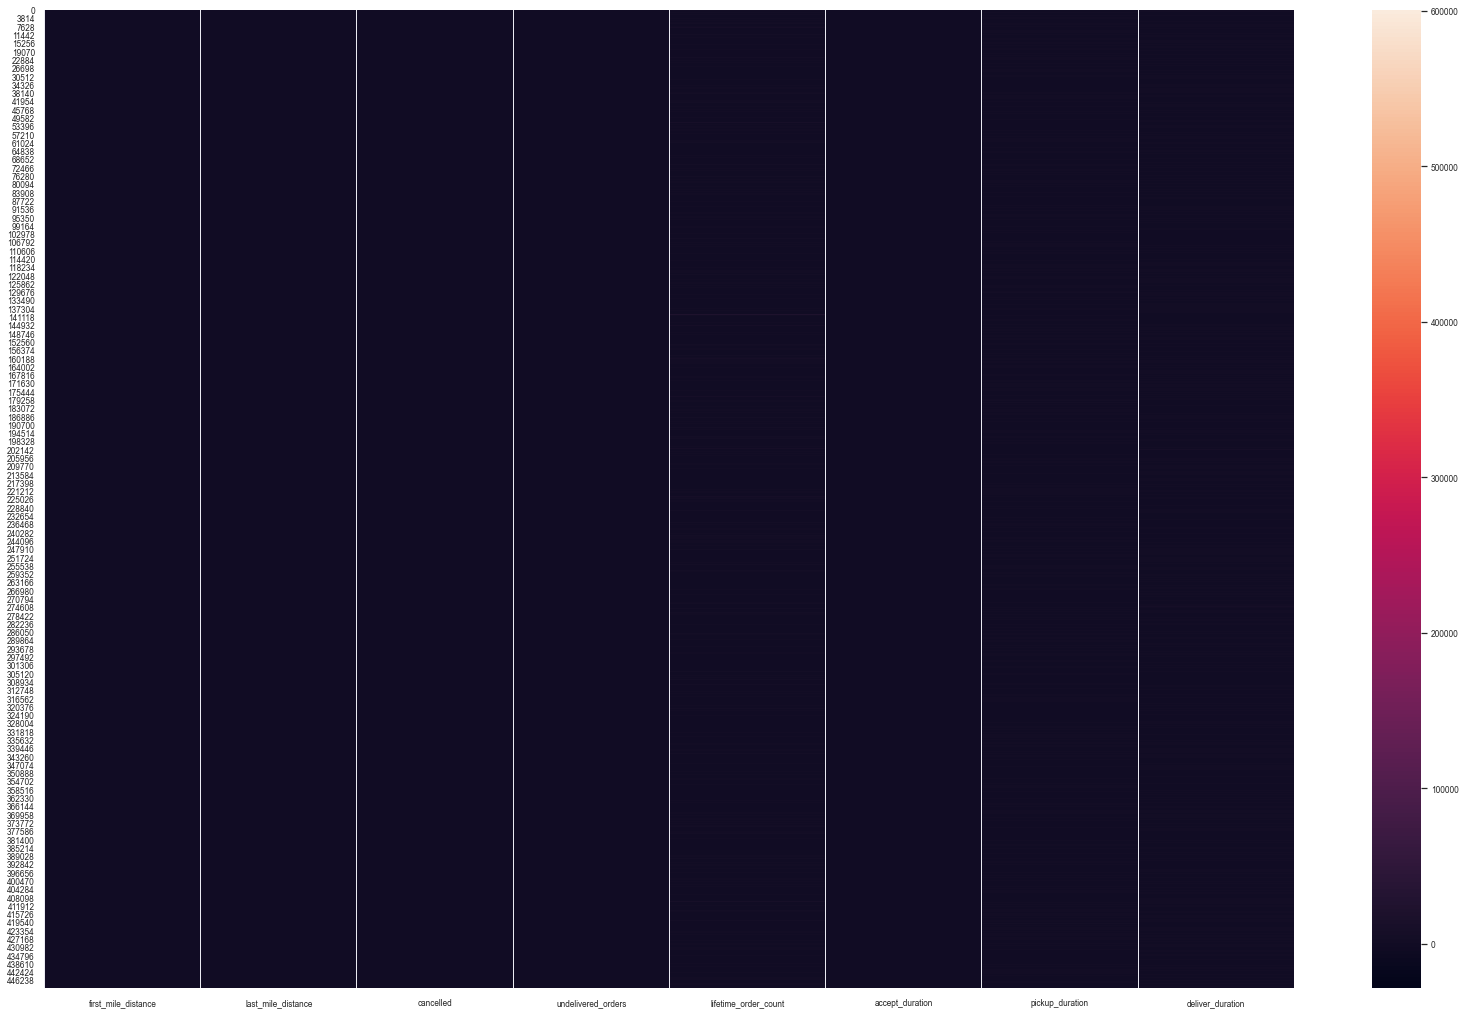

In [54]:
sns.heatmap(data=df)
plt.rcParams['figure.figsize'] = (28, 18)

In [57]:
df2 = df.dropna()

<AxesSubplot:>

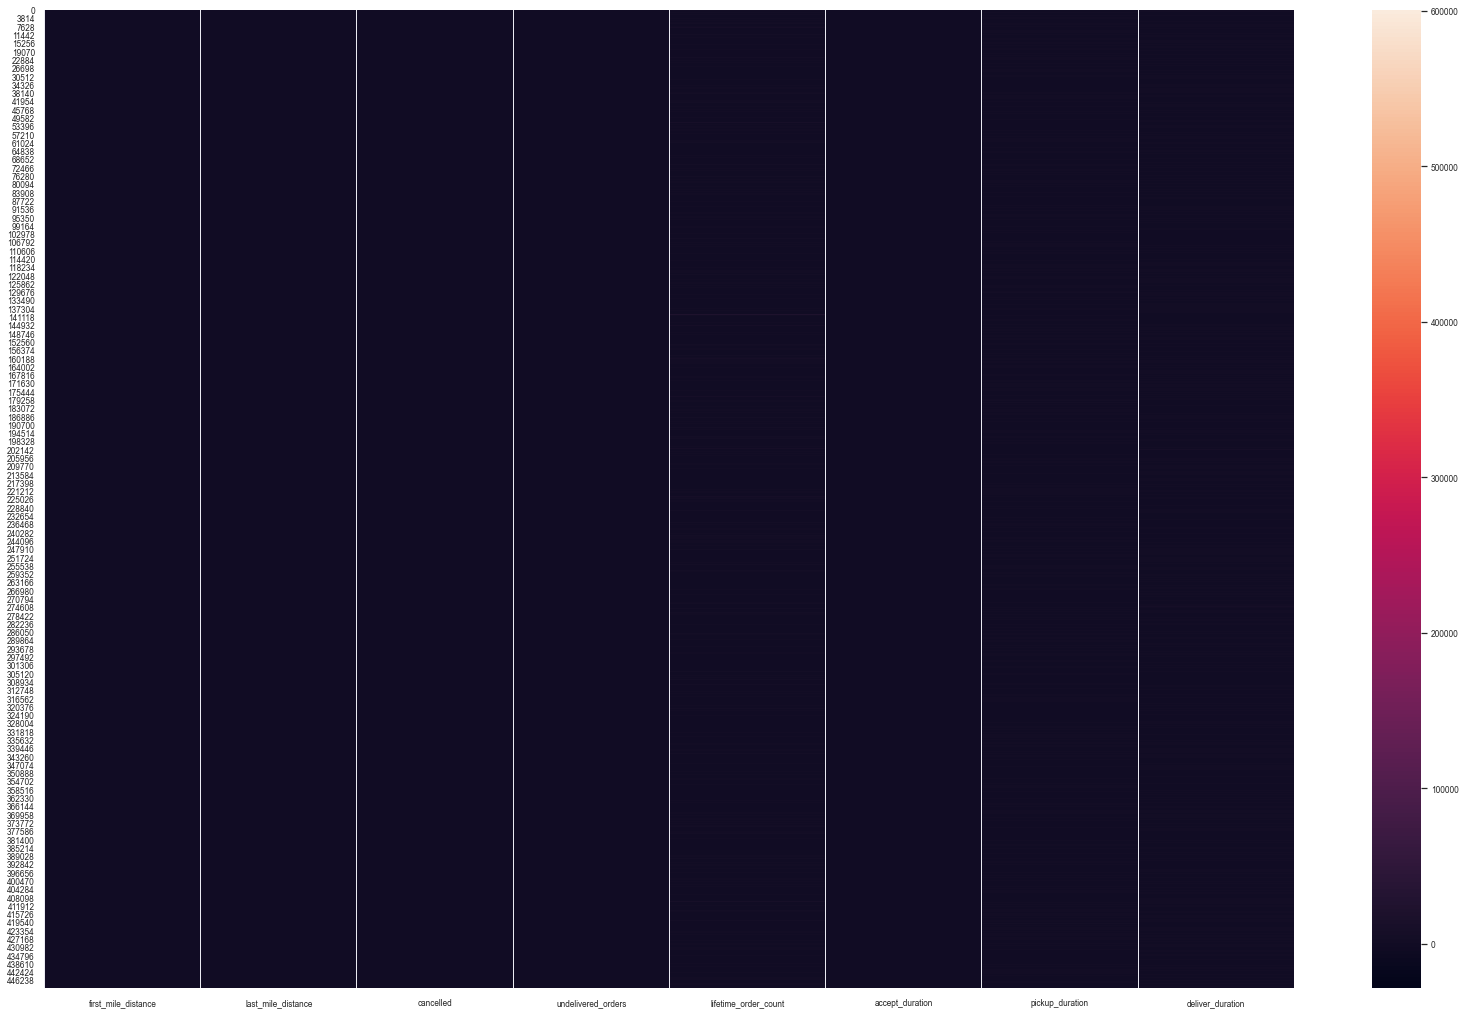

In [59]:
sns.heatmap(data=df)

In [64]:
type(df2)

pandas.core.frame.DataFrame

In [78]:
df2_X = df2.drop(['cancelled'], axis = 1)
df2_y = df2['cancelled']
df2_y.shape

(444780,)

In [79]:
df2_y.shape

(444780,)

In [85]:
from sklearn import preprocessing
X = df2_X.values 
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
df2_X = pd.DataFrame(X_scaled, columns = ['first_mile_distance','last_mile_distance','undelivered_orders','lifetime_order_count','accept_duration','pickup_duration','deliver_duration'])

In [87]:
df2_X

,first_mile_distance,last_mile_distance,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,0.399312,-0.167452,-0.737756,-0.156211,-0.544419,-0.203571,0.015042
1,1.527813,-0.108986,-0.737756,-0.498825,-0.136464,0.103238,0.105698
2,1.157245,0.975283,-0.737756,-0.524720,-0.471196,0.110469,0.011168
3,1.135954,1.815060,-0.737756,-0.484217,-0.209687,1.162089,0.068506
4,1.842790,0.555394,-0.737756,-0.512768,-0.261989,0.600123,0.286624
...,...,...,...,...,...,...,...
444775,-0.768931,-1.474953,-0.737756,-0.484217,-0.324751,0.573264,0.008456
444776,0.895730,-0.943448,-0.737756,-0.498825,0.156426,0.230300,-0.159298
444777,0.432194,-0.720216,-0.737756,0.419461,-0.293370,0.027827,-0.196490
444778,1.969231,0.911502,-0.737756,-0.498825,0.846810,0.059851,-0.145351


In [96]:
df3 = pd.read_csv('test.csv')
df3.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.6585,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.0709,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.3884,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333
3,2021-02-06 10:03:29,130234,2021-02-06 00:00:00,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.9039,2.59,125.0,122.0,3.0,1020.0,NaN,NaN,NaN,291.933333
4,2021-02-06 10:03:35,130235,2021-02-06 00:00:00,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.8275,0.94,352.0,350.0,2.0,7284.0,NaN,NaN,NaN,247.133333


In [97]:
df2_y.isna().sum()

0